# １つの変数の記述統計
１つの変数をどのように記述するかというのを学ぶ

<hr>

## １つの変数の予約
### 数値要約
「あるクラスの英語力はおおよそこんな感じ」 と記述するようなデータの持つ特徴を１つの数値にまとめること

<hr>

## データの説明
ここではサンプルデータを用いて進める。各データの内容は下記。
- id：通し番号
- name：生徒の名前
- sex：性別
- math: 数学が好きかどうかの回答
- stats：統計が好きかどうかの回答
- psychology_test：心理学テストの点数（20点満点）
- stats_test1：統計テスト１の事前点数（20点満点）
    - 事前の意味はこの20人に統計学の力が向上するような指導法を行う前に実施したテストの点数
- stats_test2：統計テスト２の事後点数（20点満点）
    - 事後の意味はこの20人に統計学の力が向上するような指導法を行ったあとに実施したテストの点数
- teaching_method：統計学の力を向上させることを目指して実施された指導法４種（A B C,D）

In [1]:
import pandas as pd
data = pd.read_csv('../data/teaching_method.csv')
data

id name sex math stats  psychology_test  stats_test1  stats_test2  \
0    1   大村   男   嫌い    好き               13            6           10   
1    2   本多   男   嫌い    好き               14           10           13   
2    3   川崎   男   好き    好き                7            6            8   
3    4   多村   男   好き    好き               12           10           15   
4    5   松中   男   嫌い    嫌い               10            5            8   
5    6  小久保   男   嫌い    嫌い                6            3            6   
6    7   柴原   男   嫌い    嫌い                8            5            9   
7    8   井手   男   嫌い    嫌い               15            9           10   
8    9   田上   男   嫌い    嫌い                4            3            7   
9   10   松田   男   好き    嫌い               14            3            3   
10  11   高谷   女   好き    好き                9           11           18   
11  12   杉内   女   嫌い    好き                6            6           14   
12  13   和田   女   好き    好き               10           11           18   
13  14   新垣   女   嫌い    嫌い               12            9           11   
14  15   大隣   女   嫌い    好き                5            7           12   
15  16   水田   女   好き    嫌い               12            5            5   
16  17   斎藤   女   嫌い    嫌い                8            8            7   
17  18   柳瀬   女   嫌い    嫌い                8            7           12   
18  19   佐藤   女   嫌い    嫌い               12            7            7   
19  20   馬原   女   嫌い    嫌い               15            9            7   

   teaching_method  
0                C  
1                B  
2                B  
3                A  
4                B  
5                C  
6                A  
7                D  
8                D  
9                D  
10               A  
11               A  
12               A  
13               C  
14               B  
15               D  
16               C  
17               C  
18               B  
19               D

<hr>

## 変数の種類
- 質的変数
    - 名義尺度：他と区別し分類するための名称のようなもの（男女、血液型など）
    - 順序尺度：順序や大小には意味があるが間隔には意味がないもの（１位、２位など）
- 量的変数
    - 間隔尺度：目盛が等間隔になっているもので、その間隔に意味があるもの（温度、西暦など）
    - 比例尺度：0が原点であり、間隔と比率に意味があるもの（身長、速度など）
    
統計解析では質的変数と量的変数の区別が重要で、変数によって適用できる統計解析が変わる。

<hr>

## データの視覚的表現
teaching_methodの指導法ごとにカウントを行ってみよう。
各カテゴリーに含まれるデータの個数のことを統計学では<b>度数</b>という。またそれらをまとめたものを<b>度数分布</b>といい、それらを表にしたものを<b>度数分布表</b>という。

In [2]:
data.groupby('teaching_method').count()

id  name  sex  math  stats  psychology_test  stats_test1  \
teaching_method                                                             
A                 5     5    5     5      5                5            5   
B                 5     5    5     5      5                5            5   
C                 5     5    5     5      5                5            5   
D                 5     5    5     5      5                5            5   

                 stats_test2  
teaching_method               
A                          5  
B                          5  
C                          5  
D                          5

psychology_testをヒストグラム表示してみよう。
何点から何点までの間に度数がどれくらいあるかというを棒と棒の隙間を開けずに図にしたものをヒストグラムという。

In [12]:
import matplotlib.pyplot as plt # よく使われるツール
import seaborn as sns # ちょっとお洒落に描いてくれる

(array([2., 2., 1., 3., 1., 2., 0., 4., 1., 4.]),
 array([ 4. ,  5.1,  6.2,  7.3,  8.4,  9.5, 10.6, 11.7, 12.8, 13.9, 15. ]),
 <a list of 10 Patch objects>)

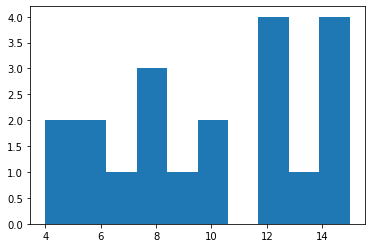

In [13]:
plt.hist(data.psychology_test)

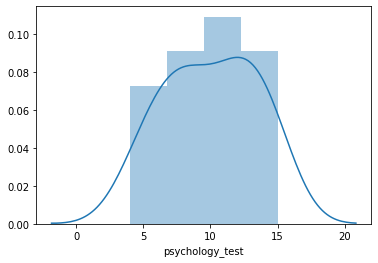

In [14]:
sns.distplot(data.psychology_test)

<hr>

## 平均とは
あるデータの代表する代表値の一つ。「サンプルデータでいうところの心理学テストは全体的にみてどうだったか？」といった質問に答えるための数値要約。
データ(x)がn個ある平均（μ：ミュー）の計算方法は
$$
\mu = \frac{1}{n}\sum_{k=1}^{n}x_n \\
平均 = \frac{データ1＋データ2＋.....+データn}{n}
$$

In [15]:
# 平均を算出する関数はmean
data.mean()

id                 10.5
psychology_test    10.0
stats_test1         7.0
stats_test2        10.0
dtype: float64

In [17]:
# カラムを指定すると単体で平均も出せます
data.psychology_test.mean()

10.0

In [19]:
# 合計出して個数で割る場合はこんな感じでできますが、基本はmean関数を使います
data.psychology_test.sum()/len(data.psychology_test)

10.0

<hr>

## 平均以外の代表値
代表値として平均を使うことは一般的だが、平均以外の代表値もある
- <b>中央値</b>：データを大きさの順に並べた場合の真ん中の値。データの数が偶数の場合は真ん中がないため真ん中の２つの値の平均を中央値とすることが一般的。外れ値などを含むデータには中央値などが適している。よくある平均年収などは外れ値が多く存在するので中央値の方が良いとされている。
- <b>最頻値</b>：その名の通り最も頻繁に観測された値のこと。必ず分布の中心になる値かというと違う。最頻値は質的変数の代表値として使われることが多い。

In [22]:
# 中央値を求める median
data.psychology_test.median()

10.0

In [24]:
# 最頻値を求める mode
data.psychology_test.mode()[0]

12

<hr>

## 散布度
平均をはじめとする代表値を列挙したが、代表値は分布の中心的な位置を確認するものであって、分布の特徴を把握する場合には不十分である。分布がどのように散らばっているかを確認する必要がある。例えばある小学校のクラスAとクラスBがあってどちらも算数の平均値は同じでもデータの散らばりが異なる場合ある。それらの散らばりのこと<b>散布度</b>という。

<hr>

## 分散、標準偏差とは
散布度としては分散を求める。n個のデータの分散の式は以下。各データの値から平均を引いたものを<b>平均からの偏差</b>という。
$$
\sigma^2 = \frac{1}{n}\sum_{k=1}^{n}(x_n - \mu)^2 \\
分散 = \frac{(データ1 - 平均)^2＋(データ2 - 平均)^2＋.....+(データn - 平均)^2}{n}
$$
分散の平方根をとったものが<b>標準偏差</b>となる。
$$
\sigma = \sqrt{\sigma^2} \\
標準偏差 = \sqrt{分散}
$$
散布度の指標として使われるのが標準偏差で、標準偏差の値が大きいほどデータの散らばりが大きいことを意味する。また分散には<b>不偏分散</b>と<b>標本分散</b>がある。
- 不偏分散：データの個数でn割る部分をn-1で計算する
- 標本分散：データの個数をnで割る
標本分散と不偏分散のどちらを使えばいいか、標本から母集団を推定する場合には不偏分散を。手元に全てのデータがある場合は標本分散を使う。なぜ不偏分散は母集団推定に使うのか気になる人は[こちら](https://mathtrain.jp/huhenbunsan)へ

In [29]:
# 標本分散を求める
data.psychology_test.var(ddof=False)

11.1

In [30]:
# 不偏分散を求める
data.psychology_test.var()

11.68421052631579

In [35]:
# 標準偏差を求める（不偏分散の平方根）
data.psychology_test.std()

3.418217448658846

In [37]:
# 実はdescribe関数を使えばいろんな統計量が算出してくる
data.describe()

id  psychology_test  stats_test1  stats_test2
count  20.00000        20.000000    20.000000    20.000000
mean   10.50000        10.000000     7.000000    10.000000
std     5.91608         3.418217     2.575185     4.116718
min     1.00000         4.000000     3.000000     3.000000
25%     5.75000         7.750000     5.000000     7.000000
50%    10.50000        10.000000     7.000000     9.500000
75%    15.25000        12.250000     9.000000    12.250000
max    20.00000        15.000000    11.000000    18.000000

<hr>

## 標準化
標準化とは平均と標準偏差が特定の値になるように、全てのデータの値を同じ式を使って変換すること。変換された得点を<b>標準得点</b>という。標準得点の中でも特に平均を0、標準偏差１となるように変換した標準得点が使われることが多い。これを<b>z得点</b>という。

$$
z = \frac{x - \mu}{\sigma} \\
z得点 = \frac{データの値 - 平均}{標準偏差}
$$

In [39]:
psychology_test_mean = data.psychology_test.mean() # 平均値
psychology_test_std = data.psychology_test.std()   # 標準偏差
data['psychology_test_z'] = (data.psychology_test - psychology_test_mean)/psychology_test_std

In [43]:
data.psychology_test_z.mean() # 丸め誤差の影響で０にならないがほぼ０

1.1102230246251566e-17

In [44]:
data.psychology_test_z.std() # 標準偏差は1

1.0

<hr>

## 偏差値
偏差値は以下の式で求められる。偏差値は平均を50、標準偏差を10になるように標準化した標準得点である。
$$
偏差値 = z得点 \times 10 + 50
$$

In [45]:
data['psychology_test_deviation_value'] = data.psychology_test_z * 10 + 50

In [47]:
data.psychology_test_deviation_value.mean() # 平均値

49.99999999999999

In [48]:
data.psychology_test_deviation_value.std() # 標準偏差

10.000000000000002

# 練習問題

practice.csvにはA大学とB大学の学生の1日のテレビ試聴時間のデータである。
1. 大学ごとのヒストグラムを描いてみよう
2. 大学ごとの平均と標準偏差を求めてみよう
3. 大学ごとに標準化してみよう